<a href="https://colab.research.google.com/github/adib0073/Educative_SSDS_course/blob/main/notebooks/EDA_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")

### Downloading data and loading data as a data frame


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/adib0073/Educative_SSDS_course/main/data/heart_disease.csv")
data.head()

,age,gender,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
categorical = ['gender','chest_pain_type', 'fasting_blood_sugar', 'restecg', 'exang', 'slope', 'thal']
continuous = ['age', 'resting_bp', 'cholestoral', 'max_hr', 'oldpeak', 'num_major_vessels']

In [7]:
data[continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
resting_bp,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestoral,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_hr,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
num_major_vessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0


### Data distribution analysis

Data Distribution


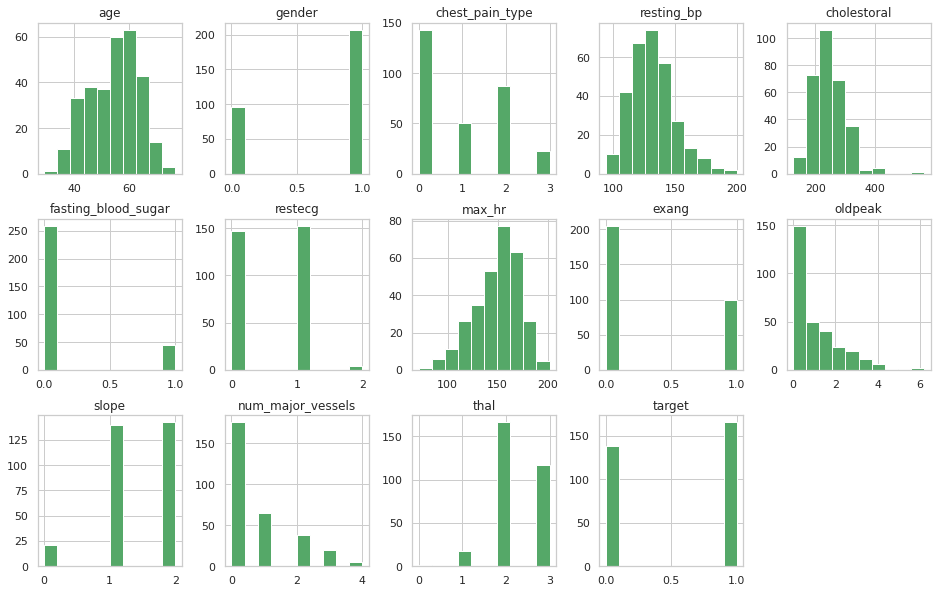

In [8]:
data.hist(layout = (3,5), figsize=(16,10), color = 'g')
print('Data Distribution')

This looks like a fairly balanced dataset, as distribution of majority and minority class is around 55:45


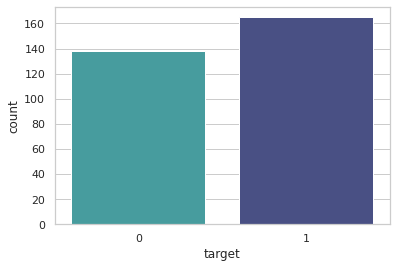

In [9]:
print('This looks like a fairly balanced dataset, as distribution of majority and minority class is around 55:45')
sns.countplot(x="target", data=data, palette="mako_r")
plt.show()

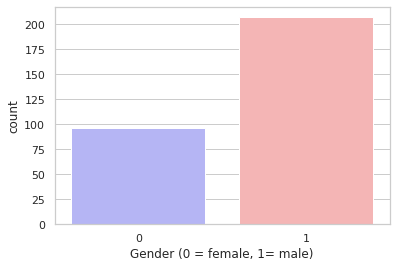

In [10]:
sns.countplot(x='gender', data=data, palette="bwr")
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

Analysing distribution of target and gender (0-female 1-male)


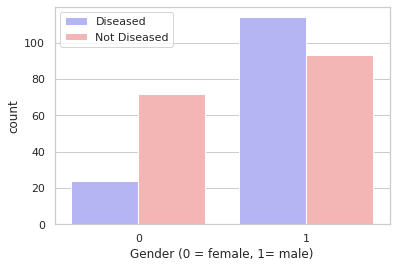

In [11]:
print('Analysing distribution of target and gender (0-female 1-male)')
sns.countplot(x = data['gender'], hue = data['target'], palette='bwr') 
plt.legend(["Diseased", "Not Diseased"])
plt.xlabel("Gender (0 = female, 1= male)")
plt.show()

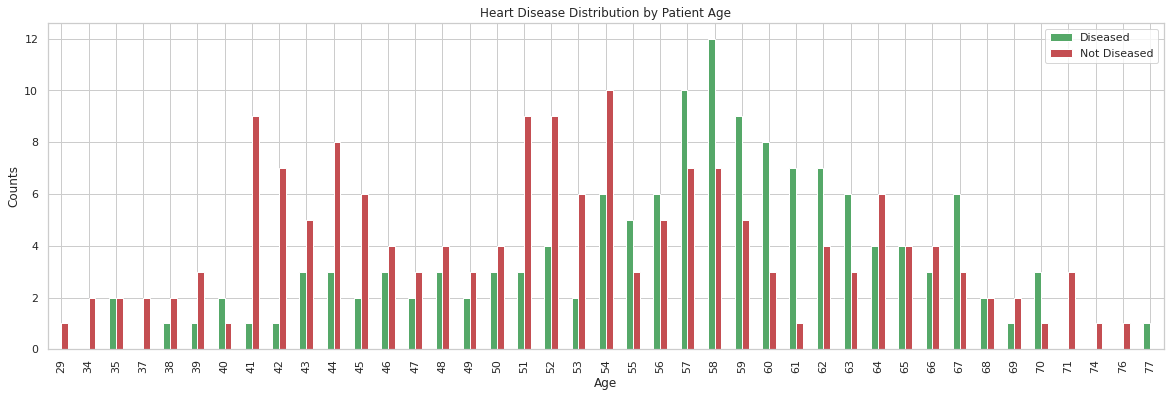

In [12]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6), color = ['g','r'])
plt.title('Heart Disease Distribution by Patient Age')
plt.legend(["Diseased", "Not Diseased"])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

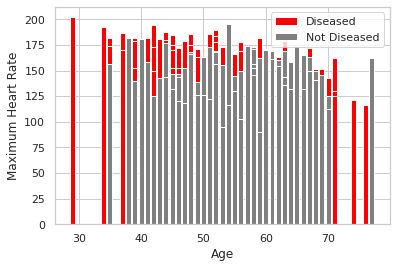

In [13]:
plt.bar(data.age[data.target==1], data.max_hr[(data.target==1)], color="red")
plt.bar(data.age[data.target==0], data.max_hr[(data.target==0)], color="grey")
plt.legend(["Diseased", "Not Diseased"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

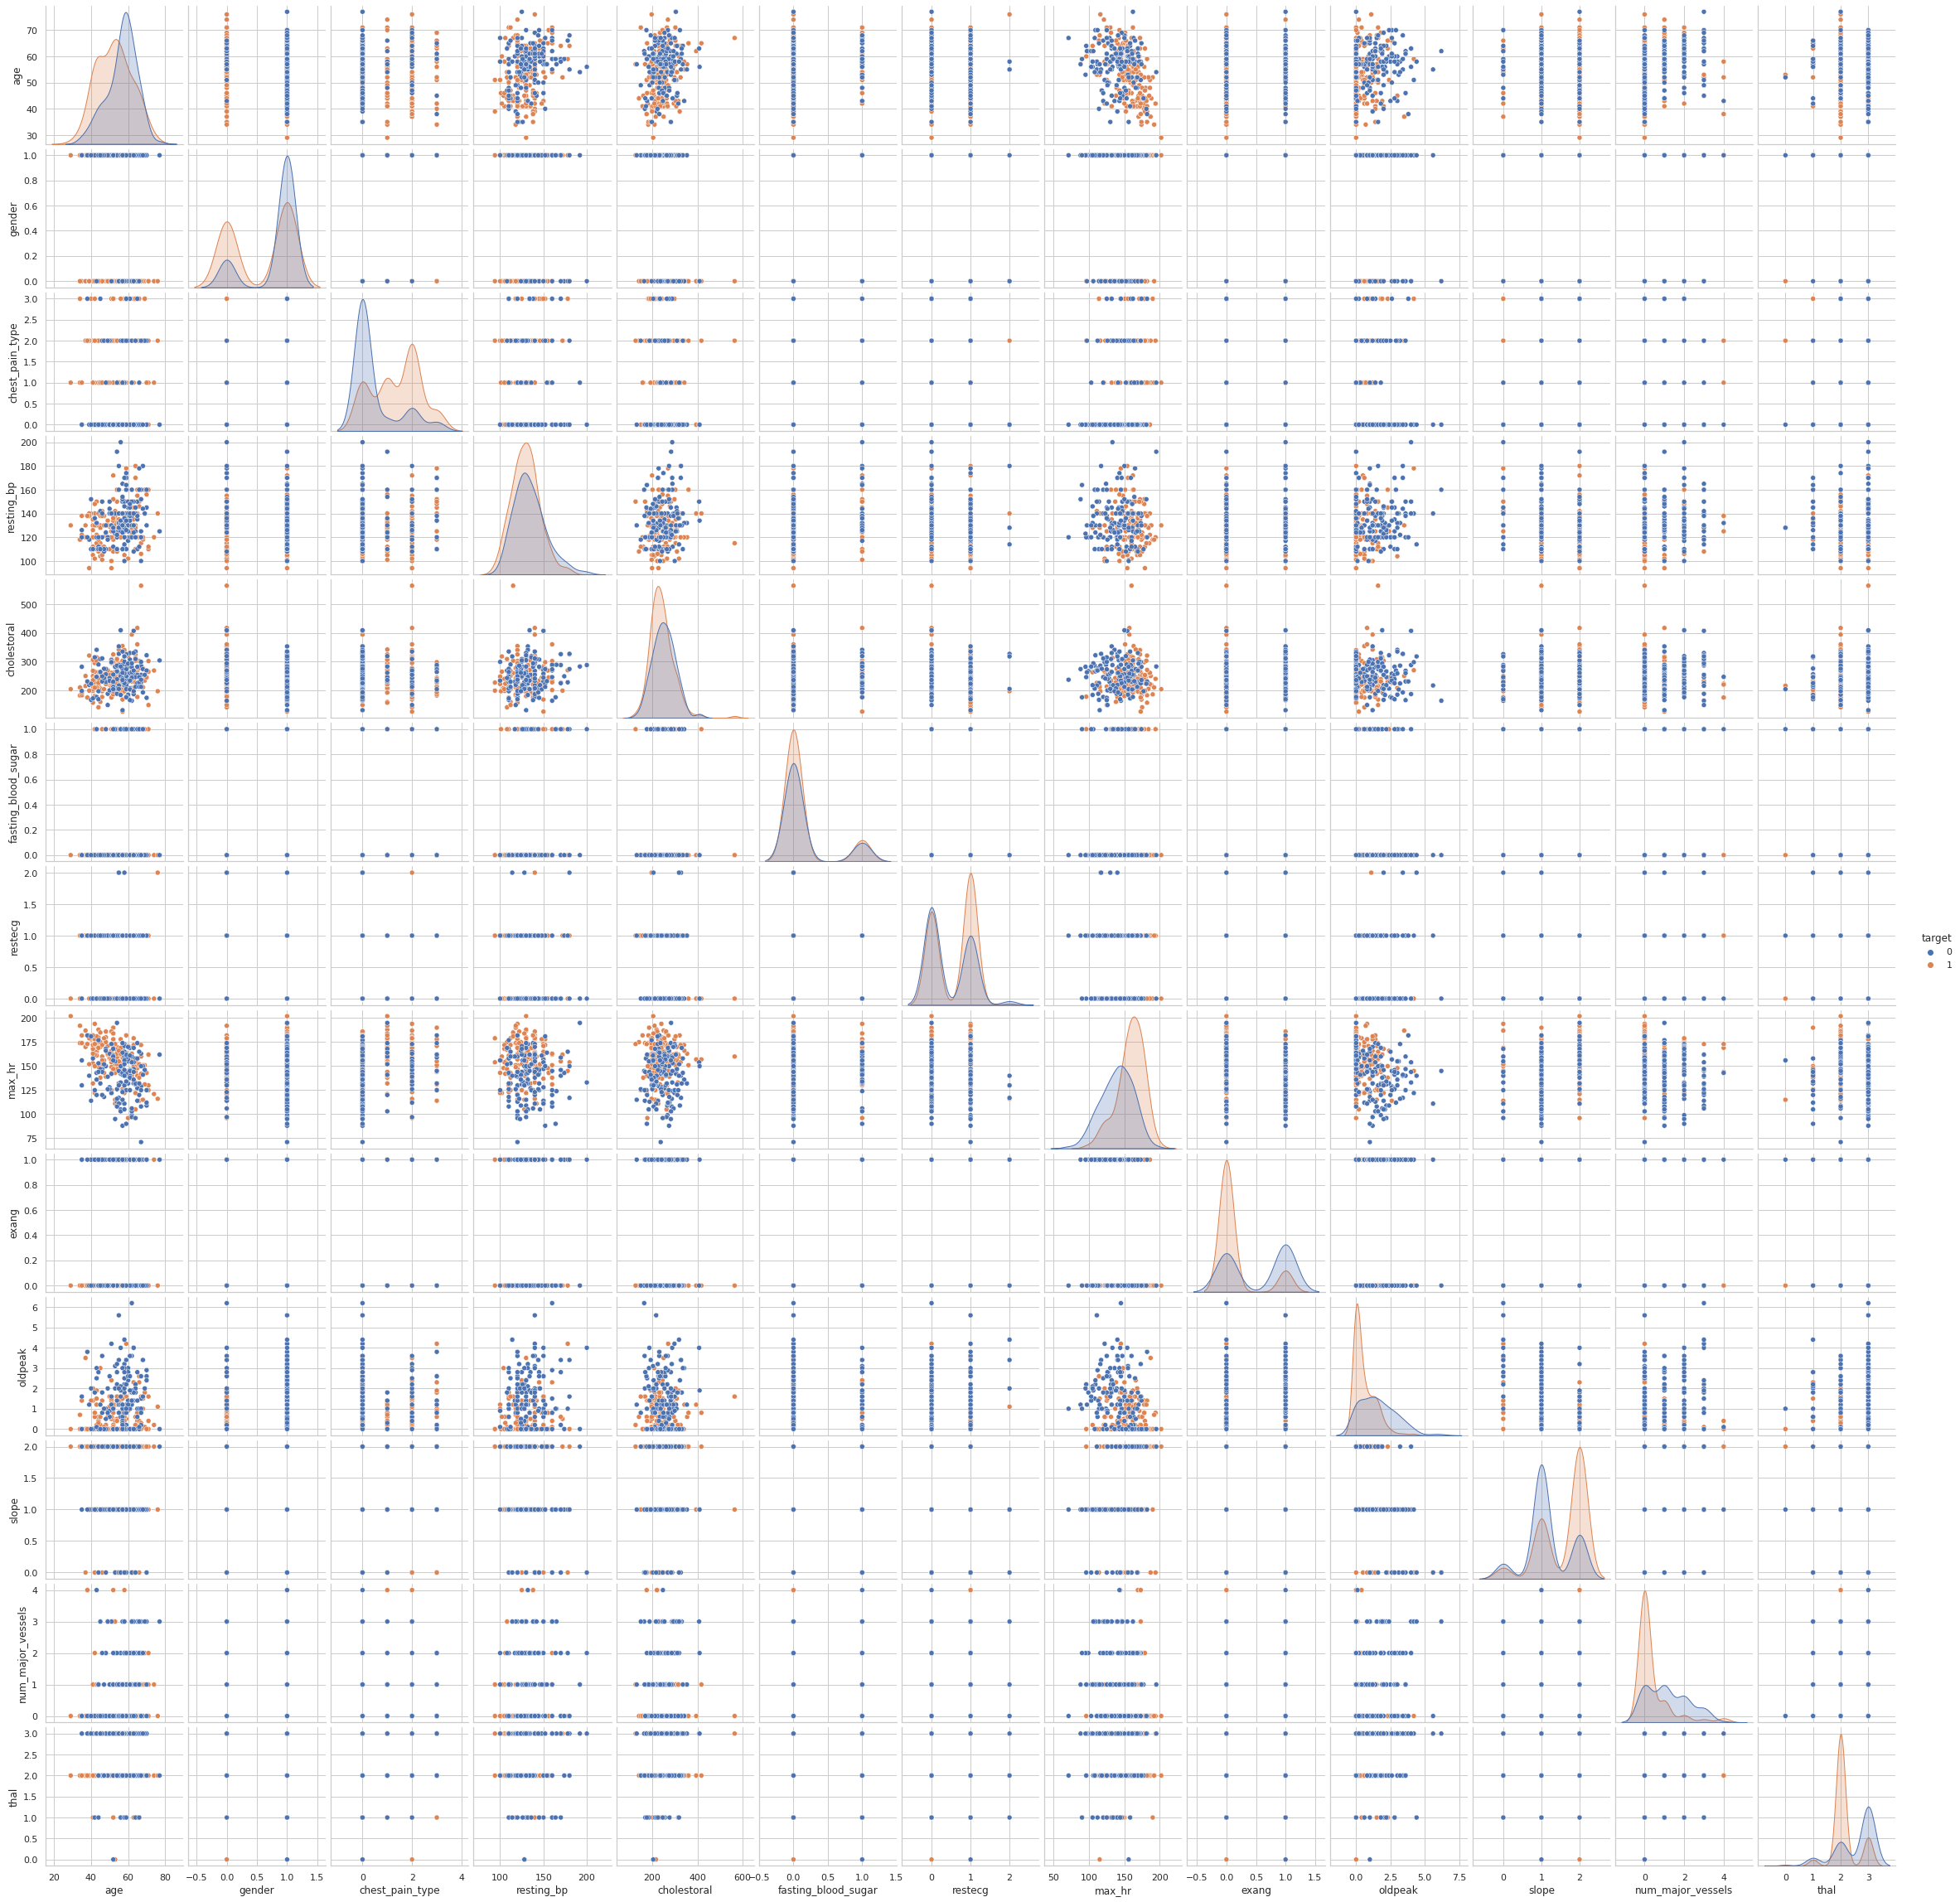

In [14]:
sns.pairplot(data=data, hue='target')

### Checking null or missing values

In [15]:
data.isnull().sum()

age                    0
gender                 0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

### Duplicate data inspection

In [16]:
data.duplicated().any()

True

In [17]:
data.drop_duplicates(subset=None, inplace=True)
data.duplicated().any()

False

In [18]:
data.shape

(302, 14)

### Outlier Detection

In [19]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [20]:
outliers = []
# Outlier detection for continuous variables
for col in continuous:
    print(f"{col} :  {check_outlier(data, col)}")
    outliers.append(check_outlier(data, col))
    
print(f"Outliers detected? {np.array(outliers).any()}")

age :  False
resting_bp :  False
cholestoral :  True
max_hr :  False
oldpeak :  False
num_major_vessels :  False
Outliers detected? True


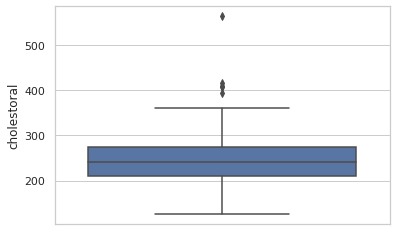

In [26]:
sns.boxplot(y="cholestoral",
            data=data)

In [ ]:
# Remove outliers for feature - Cholestrol
replace_with_thresholds(data, "cholestoral")
print(data.shape)

(302, 14)


In [ ]:
outliers = []
# Outlier detection for continuous variables
for col in continuous:
    print(f"{col} :  {check_outlier(data, col)}")
    outliers.append(check_outlier(data, col))
    
print(f"Outliers detected? {np.array(outliers).any()}")

age :  False
resting_bp :  False
cholestoral :  False
max_hr :  False
oldpeak :  False
num_major_vessels :  False
Outliers detected? False


### Data Correlation Check

age                   -0.221476
gender                -0.283609
chest_pain_type        0.432080
resting_bp            -0.146269
cholestoral           -0.082272
fasting_blood_sugar   -0.026826
restecg                0.134874
max_hr                 0.419955
exang                 -0.435601
oldpeak               -0.429146
slope                  0.343940
num_major_vessels     -0.408992
thal                  -0.343101
target                 1.000000
Name: target, dtype: float64


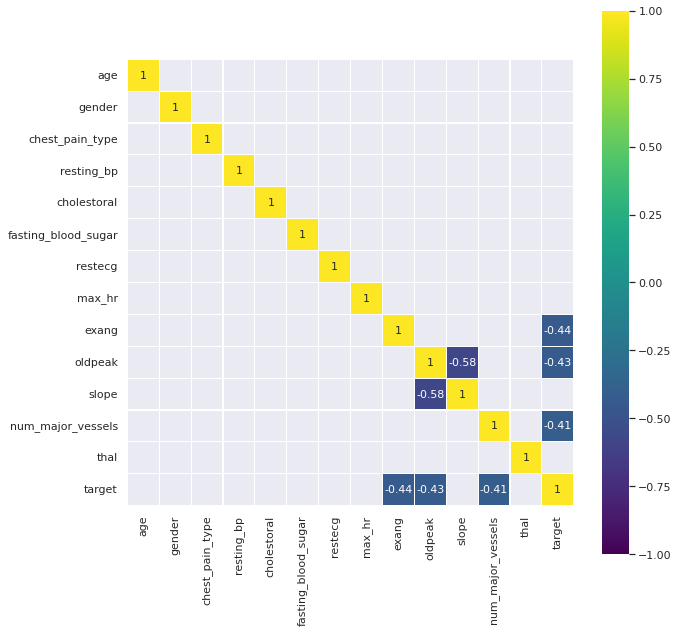

In [ ]:
sns.set_style(style="darkgrid")
print(data.corr()['target'])
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 11}, square=True);
plt.show()